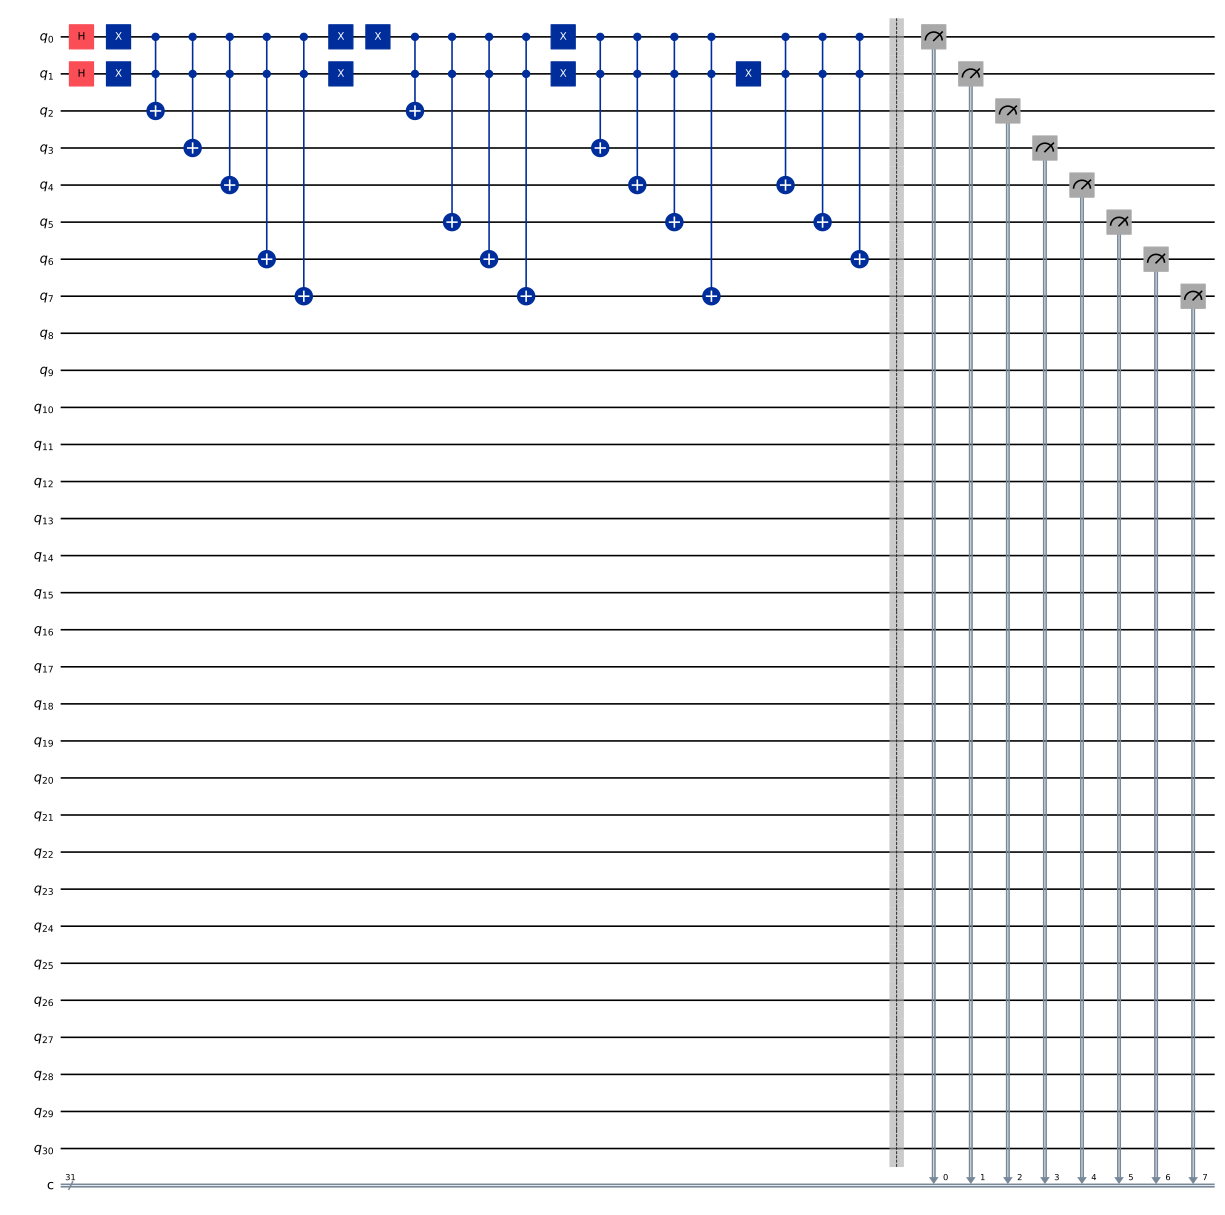

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram #plot_histogram:用来创建一个直方图
from numpy import pi
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
qc1=QuantumCircuit(31,31)#初始化变量 创建了一个有8个量子比特，8个经典比特输入的量子电路
#白白
qc1.h(0)
qc1.h(1)
qc1.x(0)
qc1.x(1)
qc1.ccx(0,1,2)
qc1.ccx(0,1,3)
qc1.ccx(0,1,4)
qc1.ccx(0,1,6)
qc1.ccx(0,1,7)
qc1.x(0)
qc1.x(1)
qc1.x(0)
qc1.ccx(0,1,2)
qc1.ccx(0,1,5)
qc1.ccx(0,1,6)
qc1.ccx(0,1,7)
qc1.x(0)
qc1.x(1)
qc1.ccx(0,1,3)
qc1.ccx(0,1,4)
qc1.ccx(0,1,5)
qc1.ccx(0,1,7)
qc1.x(1)
qc1.ccx(0,1,4)
qc1.ccx(0,1,5)
qc1.ccx(0,1,6)
qc1.barrier()
for j in range(8):
    qc1.measure(j,j)
filename = "l.pdf"
image = circuit_drawer(qc1, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)
qc1.draw(output='mpl',scale=0.8,fold=100)  #使用MatPlotLib绘图

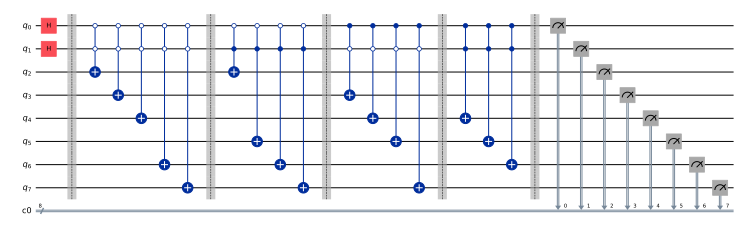

In [2]:
##1
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

q_Q = QuantumRegister(8, name='q')
c_Q = ClassicalRegister(8)

circuit = QuantumCircuit(q_Q,c_Q)# ,q_B,c_B
for h in range(2):
    circuit.append(HGate(),[h])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(2,ctrl_state='10')
circuit.append(gate2, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(2,ctrl_state='01')
circuit.append(gate3, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(2,ctrl_state='11')
circuit.append(gate4, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.barrier()
circuit.measure(q_Q,c_Q)

filename = "l.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)

circuit.draw(output='mpl',scale=0.5,fold=100)  #使用MatPlotLib绘图


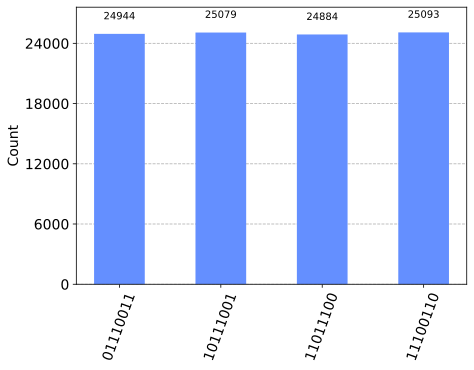

In [26]:
simulator = AerSimulator()
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=100000)

result_sim = job.result()
counts = result_sim.get_counts()
plot_histogram(counts)#使用 plot_histogram 函数，以直方图的形式展示线路执行的结果
#可以通过 result.get_counts(circuit) 获取指定线路的运行结果

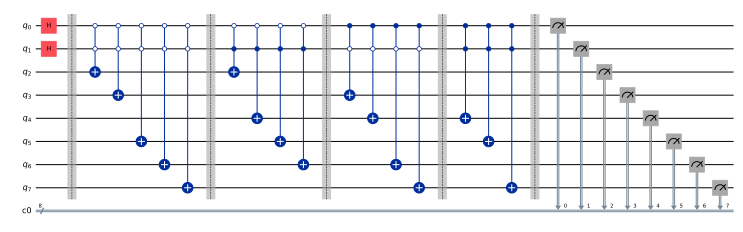

In [1]:
##2
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

q_Q = QuantumRegister(8, name='q')
c_Q = ClassicalRegister(8)

circuit = QuantumCircuit(q_Q,c_Q)# ,q_B,c_B
for h in range(2):
    circuit.append(HGate(),[h])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(2,ctrl_state='10')
circuit.append(gate2, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(2,ctrl_state='01')
circuit.append(gate3, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(2,ctrl_state='11')

circuit.append(gate4, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()
circuit.measure(q_Q,c_Q)

filename = "2.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)

circuit.draw(output='mpl',scale=0.5,fold=100)  #使用MatPlotLib绘图


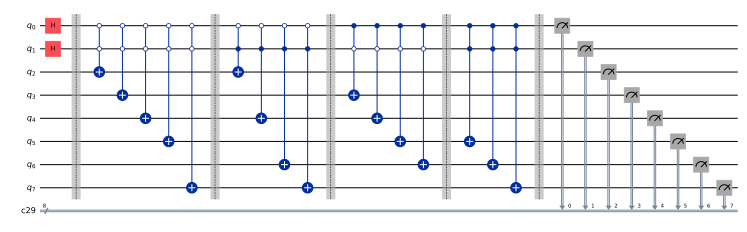

In [35]:
##3
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

q_Q = QuantumRegister(8, name='q')
c_Q = ClassicalRegister(8)

circuit = QuantumCircuit(q_Q,c_Q)# ,q_B,c_B
for h in range(2):
    circuit.append(HGate(),[h])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(2,ctrl_state='10')
circuit.append(gate2, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(2,ctrl_state='01')
circuit.append(gate3, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(2,ctrl_state='11')

circuit.append(gate4, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()
circuit.measure(q_Q,c_Q)

filename = "3.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)

circuit.draw(output='mpl',scale=0.5,fold=100)  #使用MatPlotLib绘图


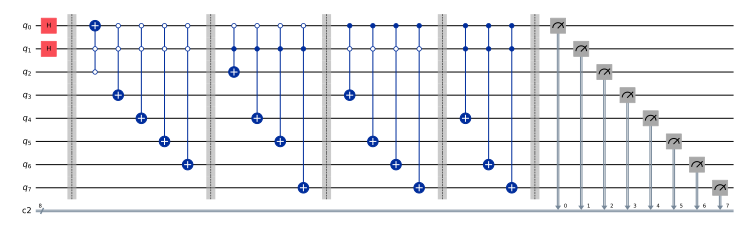

In [4]:
##4
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

q_Q = QuantumRegister(8, name='q')
c_Q = ClassicalRegister(8)

circuit = QuantumCircuit(q_Q,c_Q)# ,q_B,c_B
for h in range(2):
    circuit.append(HGate(),[h])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(2,ctrl_state='10')
circuit.append(gate2, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(2,ctrl_state='01')
circuit.append(gate3, [0, 1 ,3])#门的名称，控制位，控制目标

circuit.append(gate3, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(2,ctrl_state='11')

circuit.append(gate4, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()
circuit.measure(q_Q,c_Q)

filename = "4.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)

circuit.draw(output='mpl',scale=0.5,fold=100)  #使用MatPlotLib绘图


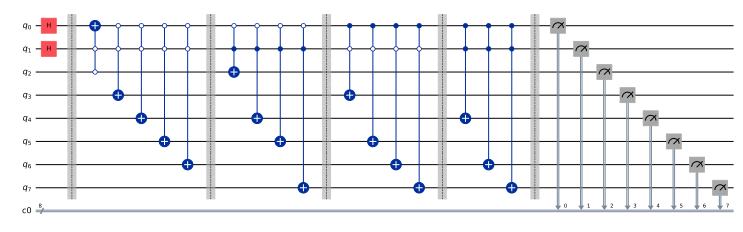

In [2]:
##4
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer

q_Q = QuantumRegister(8, name='q')
c_Q = ClassicalRegister(8)

circuit = QuantumCircuit(q_Q,c_Q)# ,q_B,c_B
for h in range(2):
    circuit.append(HGate(),[h])
circuit.barrier()

gate1 = MCXGate(2,ctrl_state='00')
circuit.append(gate1, [1 ,2 ,0])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,3])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate1, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(2,ctrl_state='10')
circuit.append(gate2, [0, 1 ,2])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate2, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(2,ctrl_state='01')
circuit.append(gate3, [0, 1 ,3])#门的名称，控制位，控制目标

circuit.append(gate3, [0, 1 ,5])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate3, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(2,ctrl_state='11')

circuit.append(gate4, [0, 1 ,4])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,6])#门的名称，控制位，控制目标
circuit.append(gate4, [0, 1 ,7])#门的名称，控制位，控制目标
circuit.barrier()
circuit.measure(q_Q,c_Q)

filename = "4.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,scale=0.8,fold=1000)
image.savefig(filename)

circuit.draw(output='mpl',scale=0.5,fold=100)  #使用MatPlotLib绘图
